In [127]:
from bs import BS_with_greeks
import numpy as np
import matplotlib.pyplot as plt

In [128]:
sigma = np.linspace(0.05, 1, 20)
spot = np.linspace(10, 200, 50)
K = 100
r = 0.0
q = 0.0
T = 1
sigma = [0.1, 0.3, 0.5]
opt_dict = {s: BS_with_greeks(S=spot, K=K, T=T, r=r, q=q, sigma=s, call_put="C") for s in sigma}


### Option price as a function of the underlying price for varying volatility levels

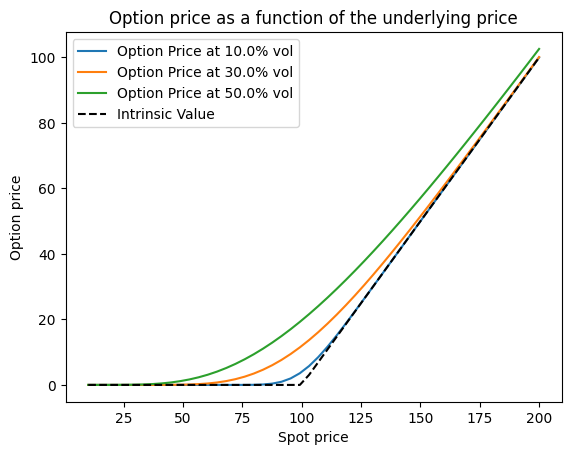

In [129]:
intrinsic_val = np.clip(spot-K, 0, None)

for s in sigma:
    plt.plot(spot, opt_dict[s][0], label=f"Option Price at {100*s}% vol")
plt.plot(spot, intrinsic_val, "k--", label="Intrinsic Value")
plt.title("Option price as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Option price")
plt.legend();

### Delta as a function of the underlying price for varying volatility levels

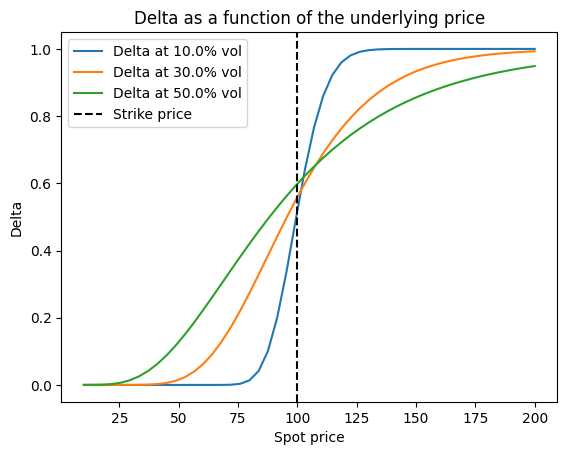

In [130]:
for s in sigma:
    plt.plot(spot, opt_dict[s][1], label=f"Delta at {100*s}% vol")
plt.title("Delta as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Delta")
plt.axvline(K, linestyle = "--", color = "black", label="Strike price")
plt.legend();

### Gamma as a function of the underlying price for varying volatility levels

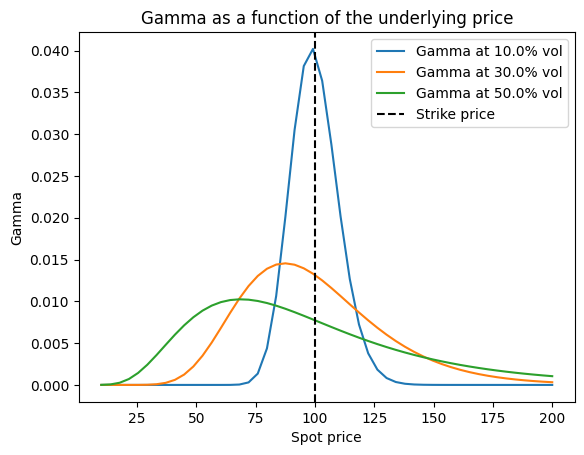

In [131]:
for s in sigma:
    plt.plot(spot, opt_dict[s][2], label=f"Gamma at {100*s}% vol")
plt.title("Gamma as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Gamma")
plt.axvline(K, linestyle = "--", color = "black", label="Strike price")
plt.legend();

### Vega as a function of the underlying price for varying volatility levels

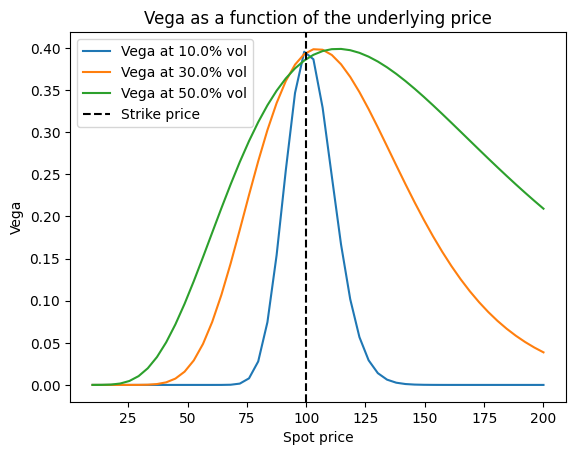

In [132]:
for s in sigma:
    plt.plot(spot, opt_dict[s][4], label=f"Vega at {100*s}% vol")
plt.title("Vega as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Vega")
plt.axvline(K, linestyle = "--", color = "black", label="Strike price")
plt.legend();

## Call-Put parity

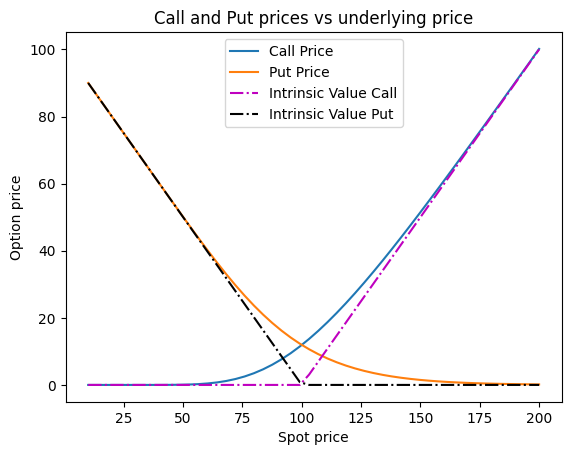

In [133]:
cpp_dict = {cpp: BS_with_greeks(S=spot, K=K, T=T, r=r, q=q, sigma=sigma[1], call_put=cpp) for cpp in ['C','P']}
plt.plot(spot, cpp_dict['C'][0],label=f"Call Price")
plt.plot(spot, cpp_dict['P'][0],label=f"Put Price")
plt.plot(spot, np.clip(spot-K,0,None), "m-.", label="Intrinsic Value Call")
plt.plot(spot, np.clip(K-spot,0,None), "k-.", label="Intrinsic Value Put")
plt.title("Call and Put prices vs underlying price")
plt.xlabel("Spot price")
plt.ylabel("Option price")
plt.legend();

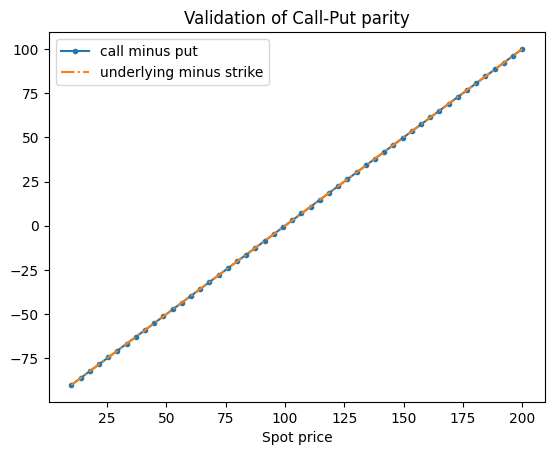

In [134]:

call_minus_put = cpp_dict['C'][0] - cpp_dict['P'][0]
spot_minus_discounted_strike = spot * np.exp(-q*T) - K * np.exp(-r*T)
plt.plot(spot, call_minus_put,'.-',label=f"call minus put")
plt.plot(spot, spot_minus_discounted_strike,'-.', label=f"underlying minus strike")
plt.title("Validation of Call-Put parity")
plt.xlabel("Spot price")
plt.ylabel("")
plt.legend();